First 5 rows of the dataset:
    type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49   

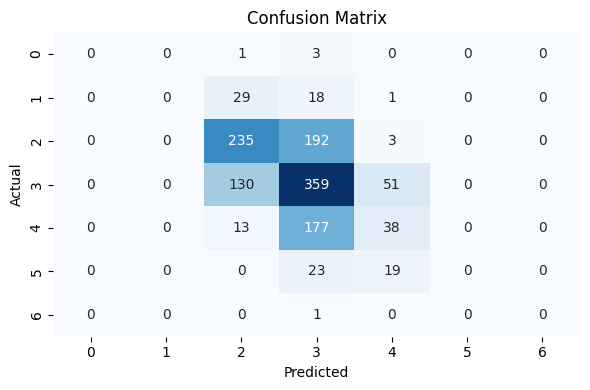

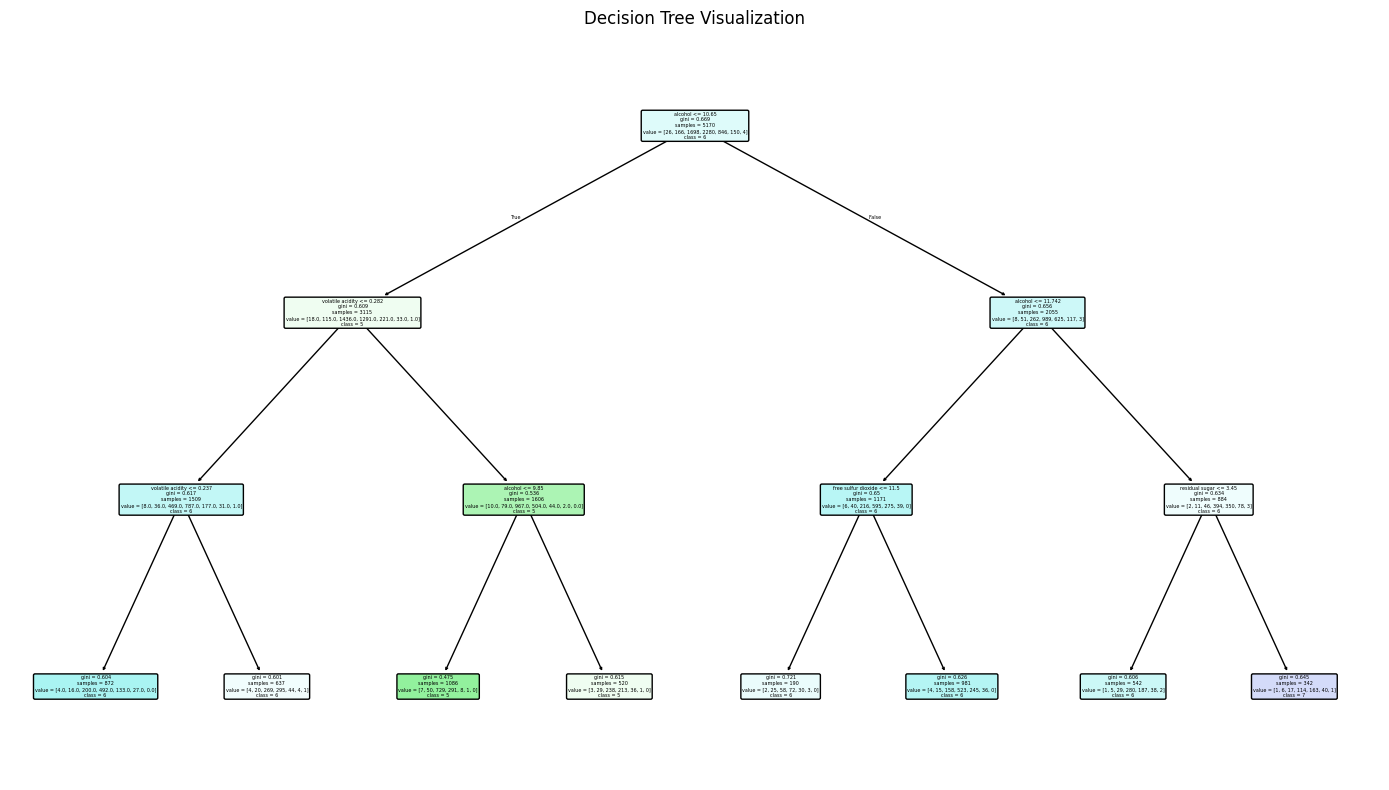

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
wine_data = pd.read_csv("/content/sample_data/winequalityN.csv")

# Preview the dataset
print("First 5 rows of the dataset:")
print(wine_data.head())

# Check for missing values
print("\nMissing values in each column:")
print(wine_data.isnull().sum())

# Drop rows with missing values
wine_data.dropna(inplace=True)

# Show data types to find object columns (strings)
print("\nColumn data types before encoding:")
print(wine_data.dtypes)

# Print unique values in string columns to debug any leftover categorical values
print("\nUnique values in object columns:")
for col in wine_data.select_dtypes(include='object').columns:
    print(f"{col}: {wine_data[col].unique()}")

# Encode all object (string) columns using one-hot encoding
wine_data = pd.get_dummies(wine_data, drop_first=True)

# Check if any non-numeric columns remain
non_numeric_columns = wine_data.select_dtypes(include='object').columns
if len(non_numeric_columns) > 0:
    print("\n⚠️ WARNING: Non-numeric columns still in dataset:", non_numeric_columns)
else:
    print("\n✅ All features are now numeric.")

# Separate features and target
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

# Double check: are all feature values numeric?
print("\nFeature types in X:")
print(X.dtypes)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train the model
dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=3)
dt_classifier.fit(X_train, y_train)

# Predict on test set
y_pred = dt_classifier.predict(X_test)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# Plot the decision tree
plt.figure(figsize=(14, 8))
plot_tree(
    dt_classifier,
    feature_names=X.columns,
    class_names=[str(label) for label in sorted(y.unique())],
    filled=True,
    rounded=True
)
plt.title('Decision Tree Visualization')
plt.tight_layout()
plt.show()
